In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv("Social_Network_Ads.csv")
df.head(3)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0


In [3]:
df.info()  #cek tipe data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [4]:
df.isnull().all()   #cek ada value null ato ngk

User ID            False
Gender             False
Age                False
EstimatedSalary    False
Purchased          False
dtype: bool

In [5]:
df.drop ('User ID', axis = 1, inplace=True) #buat drop colum

#ubah string jadi nomer
label = {'Male' : 0, 'Female' : 1}
df['Gender'].replace(label, inplace=True)

In [6]:
#baris,kolom = df.shape
#kolom = kolom
atribut = df.iloc[:,[0,1,2]]
target = df.iloc[:,3]


xtrain,xtest,ytrain,ytest = train_test_split(atribut,target,test_size=0.02,random_state=0)
print(atribut[:3])

   Gender  Age  EstimatedSalary
0       0   19            19000
1       0   35            20000
2       1   26            43000


In [7]:
# mendefinisikan model
model = LogisticRegression(random_state = 0)

# melakukan traning 
model.fit(xtrain, ytrain)


LogisticRegression(random_state=0)

In [8]:
predictions=model.predict(xtest)
print(">> data testing :")
print (xtest[:5])
print()
print(">> Purchased prediksi :",predictions[:5])
print()
print(">> Test set Accuracy: ", round(accuracy_score(ytest,predictions),2))

>> data testing :
     Gender  Age  EstimatedSalary
132       0   30            87000
309       1   38            50000
341       0   35            75000
196       1   30            79000
246       1   35            50000

>> Purchased prediksi : [0 0 0 0 0]

>> Test set Accuracy:  0.88


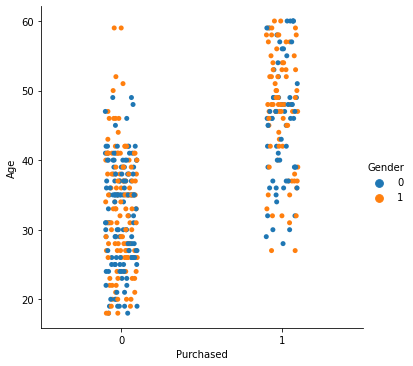

In [9]:
sns.catplot(x="Purchased", y="Age", hue="Gender", data=df )
plt.show()